In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [7]:
import numpy as np
np.random.seed(1)

def one_hot(x:list):
    return np.eye(10)[x]

In [8]:
X_train = X_train.reshape(60000, 784)
Y_train = one_hot(Y_train)

In [9]:
X_train = X_train / 255.0

In [11]:
def sigmoid(x, d=False):
    if d:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

# configs
iteration = 1000
learning_rate = 0.01
data_size = 60000
batch_size = 16
input_size = 784
output_size = 10
hidden_1 = 128
hidden_2 = 64

# weights init
weights_0 = np.random.uniform(-1, 1, (input_size, hidden_1))
weights_1 = np.random.uniform(-1, 1, (hidden_1, hidden_2))
weights_2 = np.random.uniform(-1, 1, (hidden_2, output_size))

# bias init
b_0 = 1
b_1 = 1
b_2 = 1

In [12]:
from tqdm import trange

t = trange(iteration)

# training network
for i in t:
    # batch
    a = (i % int(data_size / batch_size - 1)) * batch_size
    b = ((i % int(data_size / batch_size - 1)) + 1) * batch_size
    tmp_X_train = X_train[a:b]
    tmp_Y_train = Y_train[a:b]
    # forward
    p1 = np.dot(tmp_X_train, weights_0) + b_0
    act1 = sigmoid(p1)
    p2 = np.dot(act1, weights_1) + b_1
    act2 = sigmoid(p2)
    p3 = np.dot(act2, weights_2) + b_2
    act3 = sigmoid(p3)
    err = (tmp_Y_train - act3) ** 2
    m_err = np.mean(np.sum(err, axis=0))
    t.set_description("mean error: %f" % m_err)
    # backward
    t1 = 2 * (tmp_Y_train - act3) * sigmoid(p3, True)
    t2 = np.dot(act2.T, t1)
    t_1 = np.dot(weights_2, t1.T)
    t_2 = sigmoid(p2, True) * t_1.T
    t_3 = np.dot(act1.T, t_2)
    k1 = np.dot(weights_1, t_2.T)
    k2 = sigmoid(p1, True) * k1.T
    k3 = np.dot(tmp_X_train.T, k2)
    weights_0 = weights_0 + (learning_rate * k3)
    weights_1 = weights_1 + (learning_rate * t_3)
    weights_2 = weights_2 + (learning_rate * t2)

mean error: 0.666202: 100%|███████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 495.39it/s]


In [13]:
counter = 0

it = 10000
t = trange(it)
wrong = []

for i in t:
    test = X_test[i].flatten()
    p1 = np.dot(test, weights_0) + b_0
    act1 = sigmoid(p1)
    p2 = np.dot(act1, weights_1) + b_1
    act2 = sigmoid(p2)
    p3 = np.dot(act2, weights_2) + b_2
    act3 = sigmoid(p3)
    pred = np.argmax(act3)
    ans = Y_test[i]
    if pred == ans:
        counter = counter + 1
        t.set_description("accuracy: %d / %d" % (counter, it))
        continue
    wrong.append((i, pred, act3[pred]))

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]<ipython-input-11-8fa70d25ed81>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
accuracy: 7165 / 10000: 100%|██████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1205.28it/s]


In [4]:
from matplotlib import pyplot as plt

In [14]:
wrong

[(7, 5, 0.5302268232060754),
 (8, 6, 0.5566314056287355),
 (11, 8, 0.1479436211950077),
 (15, 0, 0.6021722530073323),
 (18, 0, 0.28723685000503957),
 (22, 1, 0.17872177516313323),
 (24, 9, 0.2569366703709165),
 (27, 9, 0.493342651571592),
 (30, 9, 0.22757562219802438),
 (33, 0, 0.49208354523437503),
 (38, 3, 0.5028756689990755),
 (39, 8, 0.4539973014609051),
 (42, 9, 0.63285430309255),
 (43, 4, 0.5421495424279553),
 (44, 9, 0.23757702538809747),
 (46, 9, 0.1844628745233515),
 (49, 2, 0.32460984924470265),
 (51, 8, 0.337990893973867),
 (53, 3, 0.4531193598837247),
 (54, 9, 0.15546671726529845),
 (59, 2, 0.25976045740437714),
 (61, 6, 0.2632905046698633),
 (63, 2, 0.6940060867456109),
 (66, 0, 0.2610200206214996),
 (68, 8, 0.5050023342998479),
 (73, 8, 0.27428289541267725),
 (77, 7, 0.9666259188591907),
 (80, 9, 0.4441601329010916),
 (84, 5, 0.4868592361193637),
 (88, 4, 0.33767170388143625),
 (94, 5, 0.3894529595866148),
 (95, 9, 0.7123602741249415),
 (97, 8, 0.2432769412679066),
 (100,

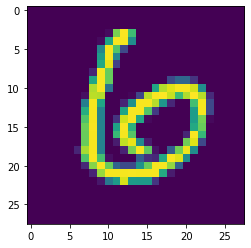

In [17]:
plt.imshow(X_test[11])
plt.show()